<h1 align=center><font size = 5>Robert Gordon University MSc in Data Science - Application Support</font></h1>

## Introduction

This Jupyter notebook was created specifically for the **Robert Gordon University's Postgraduate Admissions team** and it's purpose is to showcase the level of my skills required for entry into the **MSc Data Science**, September 2020 intake.

The below sections are a compilation of several asssingments I had resolved as part of the  **IBM Data Science Professional Certificate**.

The Table of Contents was created for the reader's ease of use. To view the full code in the markdown cells please double click on them.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [Section 1: Survey Respondents' Choices Visualised using a Bar Chart](#0)<br>
2. [Section 2: San Francisco Crime Rates Visualised with a Choropleth Map](#1)<br>
3. [Section 3: GDP vs Unemployment in the US](#2)<br>
4. [Section 4: Analysing house sale prices](#3)<br>

</div>

## Section 1: Survey Respondents' Choices Visualised using a Bar Chart<a id="0"></a>

---

**Introduction**

A survey was conducted to gauge an audience interest in different data science topics, namely:

1. Big Data (Spark / Hadoop)
2. Data Analysis / Statistics
3. Data Journalism
4. Data Visualization
5. Deep Learning
6. Machine Learning

The participants had three options for each topic: **Very Interested**, **Somewhat interested**, and **Not interested**. 2,233 respondents completed the survey. The results are available in .csv.

---

**Assignment**


Use the artist layer of Matplotlib to reproduce the bar chart below to visualize the **percentage** of the respondents' interest in the different data science topics surveyed.

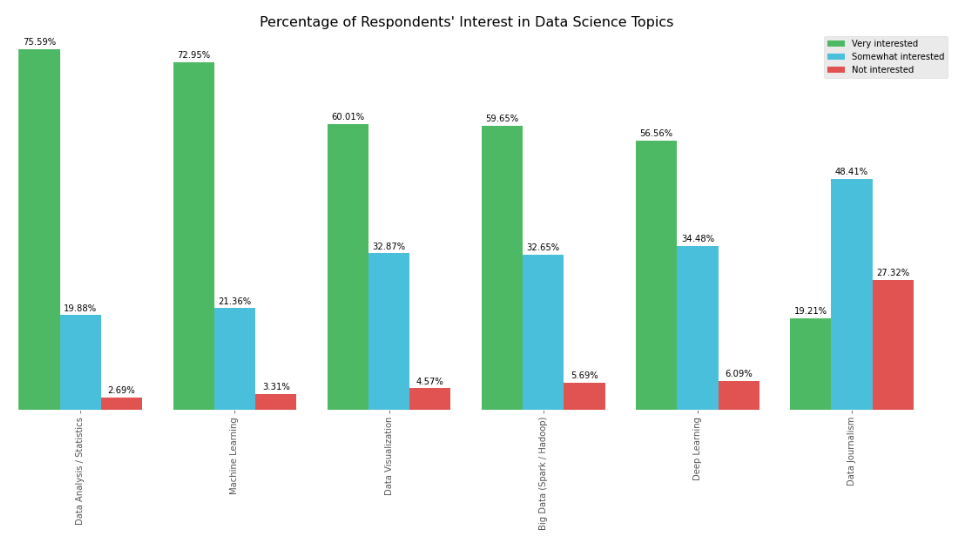

In [56]:
from IPython.display import Image
Image(filename="C:\\Users\\ungur\\Desktop\\Coursera - Intro to R\\BarChart.png")

**Chart requirements**:   
* use a figure size of (20, 8);   
* bar width of 0.8;   
* use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars;   
* use font size 14 for the bar labels, percentages, and legend;   
* use font size 16 for the title, and,   
* display the percentages above the bars as shown above, and remove the left, top, and right borders.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
mpl.style.use('ggplot')
%matplotlib inline 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import folium

#!pip install wget
import wget

from bokeh.plotting import figure, output_file, show,output_notebook
output_notebook()

print("libraries imported!")

libraries imported!


In [45]:
df_survey=pd.read_csv("https://raw.githubusercontent.com/alex-spencer03/sharing-github/master/Topic_Survey_Assignment.csv", index_col=0)
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [3]:
# checking all columns contain strings
all(isinstance(column, str) for column in df_survey.columns)

True

In [48]:
# sorting 'Very interested' descending order
df_survey.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

# converting to percentages
df_surv_perc=(df_survey*100/2233).round(2)

df_surv_perc

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


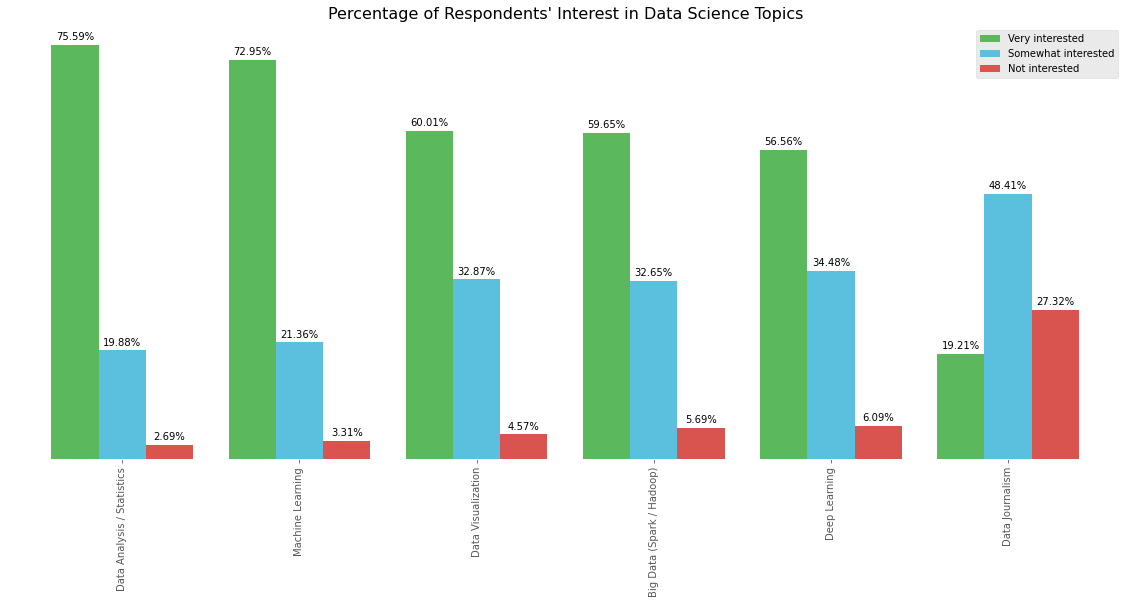

In [51]:
#plotting the graph
ax=df_surv_perc.plot(kind = "bar", figsize = (20,8), width = 0.8, color=('#5cb85c', '#5bc0de', '#d9534f'))
ax.set_title("Percentage of Respondents' Interest in Data Science Topics", fontsize = 16)
ax.set_xlabel('', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#removing the gridlines and make background white
ax.set_facecolor("white")

#removing the y axis which previously would have the percentage markers
ax.get_yaxis().set_visible(False)

#adding the percentages at the top of the bars
for i in ax.patches:
    y=i.get_height()
    x=i.get_x()+i.get_width()/2
    label = "{:.2%}".format(y/100)
    ax.annotate(label, xy=(x,y+1), ha='center')

## Section 2: San Francisco Crime Rates Visualised with a Choropleth Map<a id="1"></a>

**Introduction**:

In this section I was required to create a Choropleth map to visualize crime rates in San Francisco.

Based on the San Francisco crime dataset which can be found here, https://cocl.us/sanfran_crime_dataset, you will find that San Francisco consists of 10 main neighborhoods.

The GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco is available via this link: https://cocl.us/sanfran_geojson.

---

**Assignment**:

Generate the following map

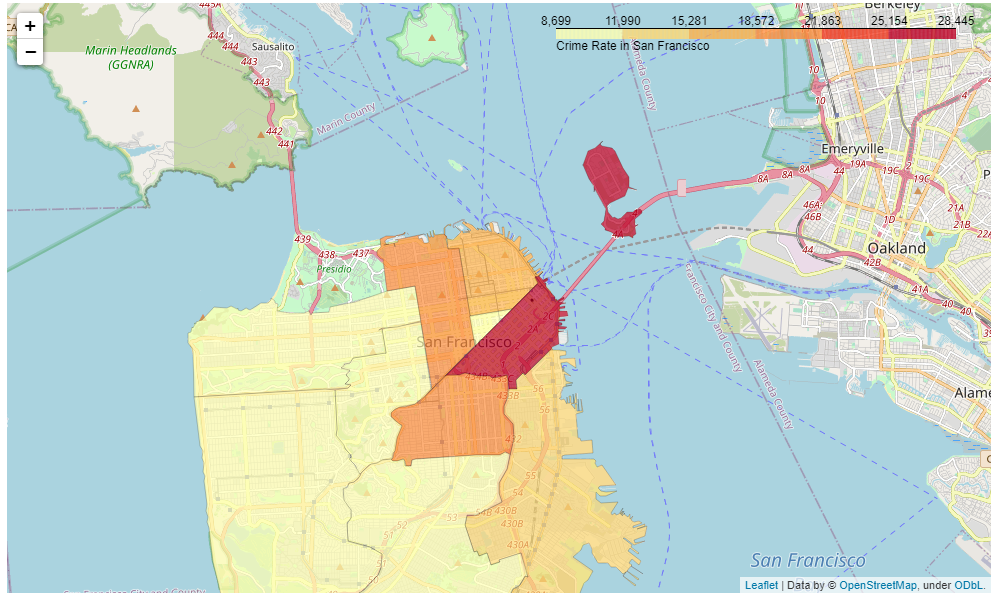

In [59]:
Image(filename="C:\\Users\\ungur\\Desktop\\Coursera - Intro to R\\SanFran.png")

**Map requirements:**   
* it is centred around San Francisco;   
* zoom level of 12;   
* fill_color = 'YlOrRd';   
* fill_opacity = 0.7;   
* line_opacity=0.2, and,   
* define a legend and use the default threshold scale.

In [114]:
df_crime=pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df_crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [115]:
# extracting the number of crimes for each neighbourhood
df_crime_neig=pd.DataFrame(df_crime['PdDistrict'].value_counts())
df_crime_neig.reset_index(level=0, inplace=True)
df_crime_neig.rename(columns={'index':'Neighbourhood', 'PdDistrict':'Count'}, inplace=True)

df_crime_neig

,Neighbourhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [116]:
url = "https://raw.githubusercontent.com/alex-spencer03/sharing-github/master/san-francisco.geojson"
san_fr_file = wget.download(url)
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [119]:
# creating blank map with San Francisco coordinates
sanfr_map=folium.Map(location=[37.77,-122.42], zoom_start=12)

# adding the data
sanfr_map.choropleth(geo_data=san_fr_file,
                    data=df_crime_neig,
                    columns=['Neighbourhood','Count','X','Y'],
                    key_on='feature.properties.DISTRICT',
                    fill_color='YlOrRd',
                    fill_opacity=0.7,
                    line_opacity=0.2,
                    legend_name='Crime Rate in San Francisco')
sanfr_map

## Section 3: GDP vs Unemployment in the US<a id="2"></a>

**Introduction**

In this assignment, I have extracted essential economic indicators and created a dashboard examining how changes in the GDP impact the unemployment rate. 

The dictionary links contain the CSV files with all the data are below.

---

**Assignment**

Create a dashboard examining how changes in the GDP impact the unemployment.

In [120]:
# importing data from GitHub
links={'GDP':'https://raw.githubusercontent.com/alex-spencer03/sharing-github/master/clean_gdp.csv',\
       'unemployment':'https://raw.githubusercontent.com/alex-spencer03/sharing-github/master/clean_unemployment.csv'}

# reading data
gdp=pd.read_csv(links['GDP'])
unem_df=pd.read_csv(links['unemployment'])

In [126]:
# creating function for dashboard
def make_dashboard(x, gdp_change, unemployment, title, file_name):
    output_file(file_name)
    p = figure(title=title, x_axis_label='year', y_axis_label='%')
    p.line(x.squeeze(), gdp_change.squeeze(), color="firebrick", line_width=4, legend_label="% GDP change")
    p.line(x.squeeze(), unemployment.squeeze(), line_width=4, legend_label="% unemployed")
    show(p)

In [127]:
# assinging dashboard variables
x=gdp[['date']]
gdp_change=gdp[['change-current']]
unemployment=unem_df[['unemployment']]
file_name = "index.html"

# adding title
title='GBP vs Unemployment in the US dashboard'

# creating dashboard
make_dashboard(x,gdp_change,unemployment,title,file_name)

## Section 4: Analysing house sale prices for King County, which includes Seattle<a id="3"></a>

**Introduction:**

The data includes homes sold between May 2014 and May 2015.

---

**Assignment**

1. Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

2. Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

3. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

4. Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.

In [130]:
# importing data from GitHub
df=pd.read_csv('https://raw.githubusercontent.com/alex-spencer03/sharing-github/master/kc_house_data_NaN.csv')

df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [131]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [132]:
df.drop(["Unnamed: 0", "id"], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [133]:
# checking for missing values
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [134]:
# replacing missing values with mean
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

# replacing missing values with mean
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

# sanity check
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


### 1. Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

(0.0, 8081250.0)

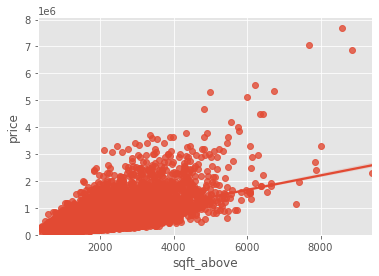

In [135]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

### 2. Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [136]:
# creating pipeline
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe1=Pipeline(Input)

# adding data
x=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
y=df[["price"]]

# predicting price
pipe1.fit(x,y)

# calculating R square
print("The R-square is:", pipe1.score(x,y))

The R-square is: 0.7513411654918181


### 3. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [40]:
# assigning attributes to variables
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

# splitting data for trainng and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# checking sizes
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [41]:
# creating ridge object with alpha set to 0.1
RidgeObject=Ridge(alpha=0.1)
RidgeObject.fit(x_train,y_train)

# calculating R squared
RidgeObject.score(x_test,y_test)

0.6478759163939117

### 4. Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.

In [42]:
# second order polynomial
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

# creating ridge object
RidgeObject2=Ridge(alpha=0.1)
RidgeObject2.fit(x_train_pr, y_train)

# calculating R squared
RidgeObject2.score(x_test_pr, y_test)

0.700274428968126

# Thank you for your time and consideration!

This notebook was created by [Alexandra Ungureanu](https://www.linkedin.com/in/alex-e-ung). I hope you found this notebook useful in considering my application for the MSc Data Science. 

Please feel free to contact me if you have any questions!